# Visualize

[Article source](https://arm-stm.blogspot.com/search/label/%D1%81%D0%B8%D0%BD%D1%85%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9%20%D1%83%D1%81%D0%B8%D0%BB%D0%B8%D1%82%D0%B5%D0%BB%D1%8C)


In [1]:
!pip install numpy matplotlib pandas

     |████████████████████████████████| 20.0MB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 13.1MB 25.7MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 35.9MB/s eta 0:00:01
     |████████████████████████████████| 92kB 33.2MB/s eta 0:00:01
     |████████████████████████████████| 71kB 32.7MB/s eta 0:00:01
     |████████████████████████████████| 512kB 55.9MB/s eta 0:00:01


In [79]:
import numpy as np
from numpy.random import uniform
from numpy.fft import rfft, rfftfreq
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

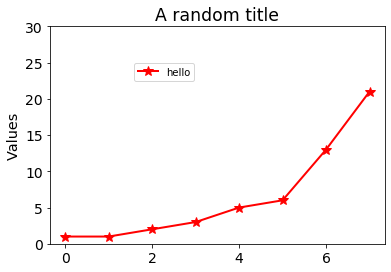

In [23]:
data = [1,1,2,3,5,6,13,21]
data2 = [1,1,2,3,5,6,13,21]
plt.figure()
plt.title('A random title', size ='xx-large')
plt.ylabel('Values', size='x-large')
plt.ylim(0,30)
plt.plot(data, 'r*-', markersize=10, linewidth=2, label='hello')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc=(0.25,0.75), scatterpoints=1)

In [110]:
FD = 22050 # частота дискретизации, отсчётов в секунду
# а это значит, что в дискретном сигнале представлены частоты от нуля до 11025 Гц (это и есть теорема Котельникова)
T = 0.01 # время 0.01 сек
t = np.arange(0, T, 1.0/FD); # time points in range
def sine_wave(freq, phase=0):
    ph_rad = (phase/360.0)*(2.0*np.pi)
    return np.sin((2 * np.pi * freq * t) + ph_rad)
# define of input signal
def input_signal():
    add1 = sine_wave(50) # 50Hz from power
    signal = sine_wave(1000, 0)
    add2 = sine_wave(2500) # additional 
    noise = uniform(-.1,.1,len(t)) 
    return signal + add1 + add2
# define of input signal
def reference_signal():
    return sine_wave(1000, 0)

mult = input_signal() * reference_signal()

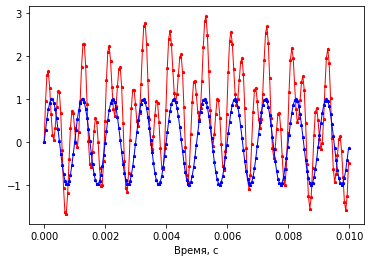

In [111]:
plt.xlabel('Время, c')
plt.plot(t, input_signal(), 'r*-', markersize=3, linewidth=1)
plt.plot(t, reference_signal(), 'b*-', markersize=3, linewidth=1)
#plt.plot(t, sine_wave(100, 90), 'b*-', markersize=3, linewidth=1)

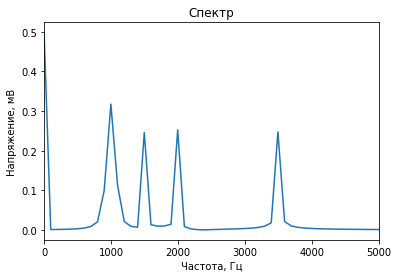

In [115]:
# вычисляем преобразование Фурье. Сигнал действительный, поэтому надо использовать rfft, это быстрее, чем fft
spectrum = rfft(mult)
# rfftfreq сделает всю работу по преобразованию номеров элементов массива в герцы
# нас интересует только спектр амплитуд, поэтому используем abs из numpy (действует на массивы поэлементно)
# делим на число элементов, чтобы амплитуды были в милливольтах, а не в суммах Фурье. Проверить просто — постоянные составляющие должны совпадать в сгенерированном сигнале и в спектре
plt.xlabel(u'Частота, Гц')
plt.xlim(0,5000)
plt.ylabel(u'Напряжение, мВ')
plt.title(u'Спектр')
# Потом спектр
plt.plot(rfftfreq(len(t), 1./FD), np.abs(spectrum)/len(t)); # ';' for supress output